In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/content/hr_dataset (1).csv")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14999 non-null  float64
 1   evaluation            14999 non-null  float64
 2   number_of_projects    14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   promotion             14999 non-null  int64  
 7   department            14999 non-null  object 
 8   salary                14999 non-null  object 
dtypes: float64(2), int64(5), object(2)
memory usage: 1.0+ MB


checking outliers

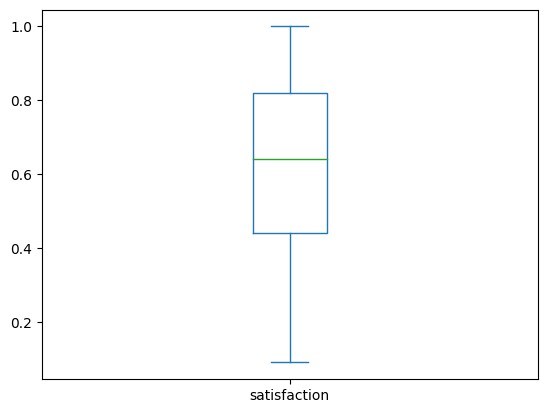

In [17]:
df['satisfaction'].plot(kind = "box")
plt.show()

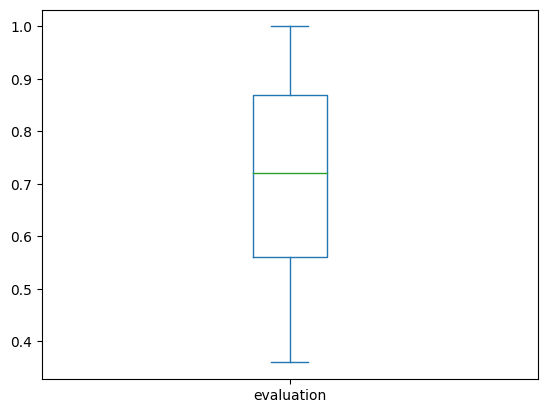

In [18]:
df['evaluation'].plot(kind = "box")
plt.show()

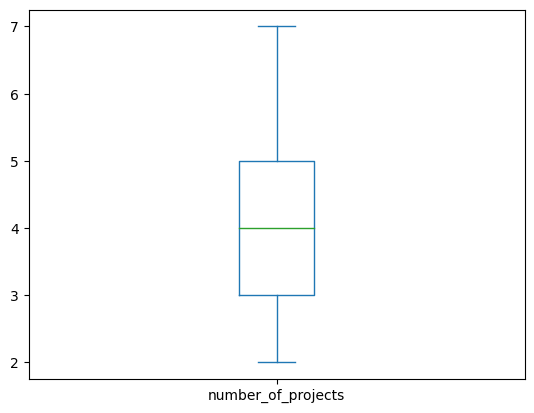

In [19]:
df['number_of_projects'].plot(kind = "box")
plt.show()

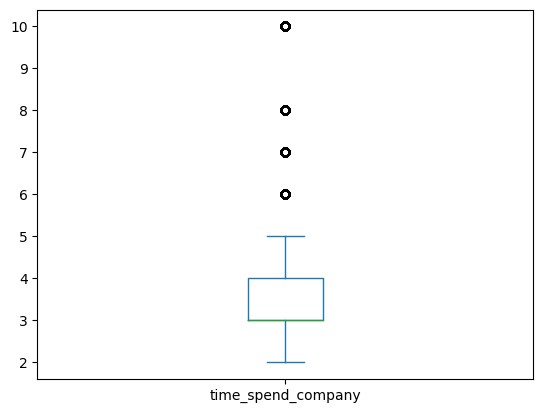

In [20]:
df['time_spend_company'].plot(kind = "box")
plt.show()

log transformation for time_spend_company

In [21]:
df['log_tsc'] = np.log(df['time_spend_company'])

In [22]:
df['log_tsc'].skew(), df['time_spend_company'].skew()

(0.5885330284719315, 1.8533190474339154)

In [23]:
df['log_tsc'].kurtosis(), df['time_spend_company'].kurtosis()

(0.2624249861436705, 4.773210725010069)

<ipython-input-24-e9eba130214d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['time_spend_company'], ax = axes[0])
<ipython-input-24-e9eba130214d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['log_tsc'], ax = axes[1])


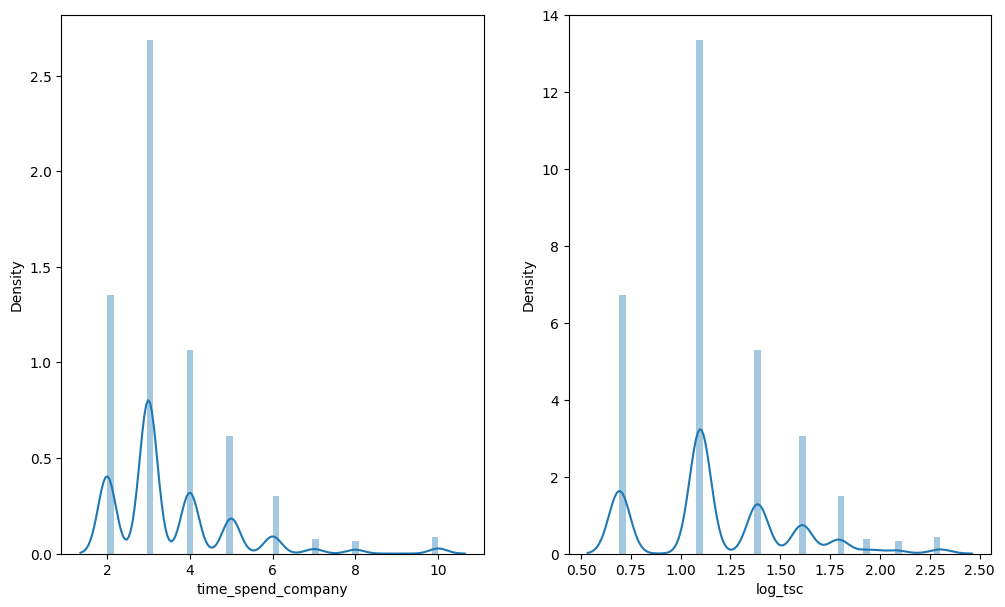

In [24]:
fig, axes = plt.subplots(1,2, figsize = (12,7))
sns.distplot(df['time_spend_company'], ax = axes[0])
sns.distplot(df['log_tsc'], ax = axes[1])
plt.show();

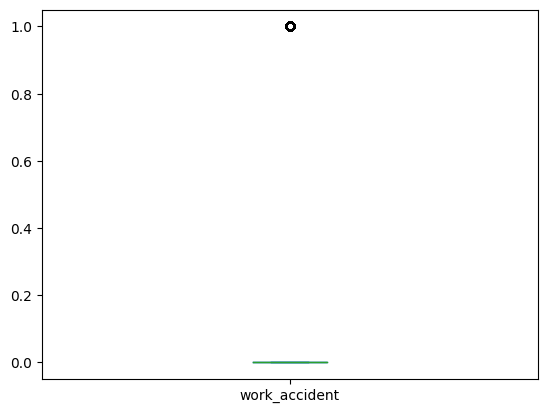

In [25]:
df['work_accident'].plot(kind="box")
plt.show()

square root transform for work accident

In [27]:
df['sqrt_work_accident'] = df['work_accident'] ** 0.5

In [28]:
df['sqrt_work_accident'].skew()

2.021148738456709

In [29]:
df['work_accident'].skew()

2.021148738456709

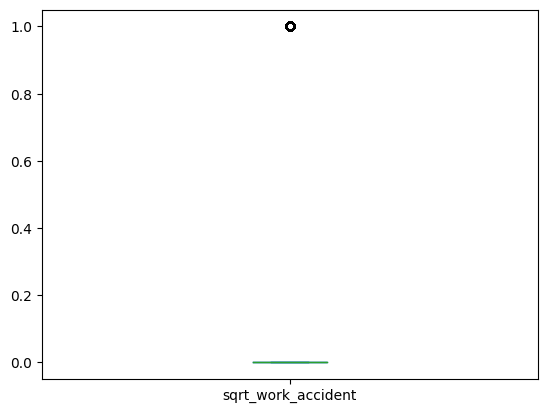

In [30]:
df['sqrt_work_accident'].plot(kind="box")
plt.show()

outlier treatment using capping approach -detecting and droping values

In [31]:
import scipy.stats as stats

In [32]:
df['zr'] = stats.zscore(df['work_accident'])
df[(df['zr'] < -3) | (df['zr']> 3)].index

Int64Index([], dtype='int64')

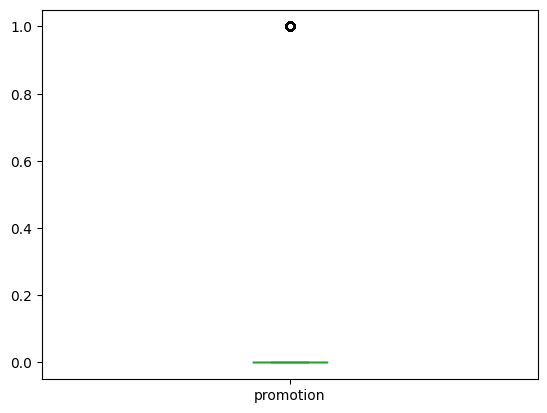

In [33]:
df['promotion'].plot(kind = "box")
plt.show()

In [34]:
df['zr_promotion'] = stats.zscore(df['promotion'])
df[(df['zr_promotion'] < -3) | (df['zr_promotion']> 3)].index

Int64Index([   18,    82,   171,   287,   584,   751,  1000,  1667,  4499,
             4500,
            ...
            14205, 14206, 14207, 14208, 14209, 14229, 14293, 14382, 14498,
            14795],
           dtype='int64', length=319)

In [35]:
df['log_promotion'] = np.log(df['promotion'])

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [37]:
df['log_promotion'].skew(), df['promotion'].skew()

(nan, 6.636968380523423)

In [39]:
df['sqrt_promotion'] = df['promotion'] ** 0.5

In [40]:
df['sqrt_promotion'].skew()

6.636968380523423

iqr treatment for promotion

In [42]:
Q1 = df['promotion'].quantile(0.25)
Q2 = df['promotion'].quantile(0.5)
Q3 = df['promotion'].quantile(0.75)

In [43]:
IQR = Q3- Q1

LC = Q1 - (1.5 * IQR)
UC = Q3 + (1.5 * IQR)
print(LC, UC)

0.0 0.0


In [44]:
df["promotion"].describe()

count    14999.000000
mean         0.021268
std          0.144281
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: promotion, dtype: float64

In [45]:
df["department"].describe()

count     14999
unique       10
top       sales
freq       4140
Name: department, dtype: object

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
le = LabelEncoder()

In [48]:
df["department"] = le.fit_transform(df['department'])

In [49]:
df

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,promotion,department,salary,log_tsc,log_work_accident,sqrt_work_accident,zr,zr_promotion,log_promotion,sqrt_promotion
0,0.38,0.53,2,157,3,0,0,7,low,1.098612,-inf,0.0,-0.411165,-0.147412,-inf,0.0
1,0.80,0.86,5,262,6,0,0,7,medium,1.791759,-inf,0.0,-0.411165,-0.147412,-inf,0.0
2,0.11,0.88,7,272,4,0,0,7,medium,1.386294,-inf,0.0,-0.411165,-0.147412,-inf,0.0
3,0.72,0.87,5,223,5,0,0,7,low,1.609438,-inf,0.0,-0.411165,-0.147412,-inf,0.0
4,0.37,0.52,2,159,3,0,0,7,low,1.098612,-inf,0.0,-0.411165,-0.147412,-inf,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,8,low,1.098612,-inf,0.0,-0.411165,-0.147412,-inf,0.0
14995,0.37,0.48,2,160,3,0,0,8,low,1.098612,-inf,0.0,-0.411165,-0.147412,-inf,0.0
14996,0.37,0.53,2,143,3,0,0,8,low,1.098612,-inf,0.0,-0.411165,-0.147412,-inf,0.0
14997,0.11,0.96,6,280,4,0,0,8,low,1.386294,-inf,0.0,-0.411165,-0.147412,-inf,0.0


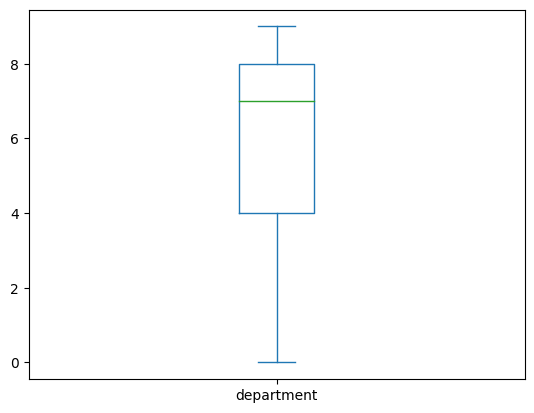

In [50]:
df['department'].plot(kind = "box")
plt.show()

In [52]:
df["salary"].describe()

count     14999
unique        3
top         low
freq       7316
Name: salary, dtype: object

In [56]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["salary"] = le.fit_transform(df['salary'])

In [58]:
df

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,promotion,department,salary,log_tsc,log_work_accident,sqrt_work_accident,zr,zr_promotion,log_promotion,sqrt_promotion,salry
0,0.38,0.53,2,157,3,0,0,7,1,1.098612,-inf,0.0,-0.411165,-0.147412,-inf,0.0,1
1,0.80,0.86,5,262,6,0,0,7,2,1.791759,-inf,0.0,-0.411165,-0.147412,-inf,0.0,2
2,0.11,0.88,7,272,4,0,0,7,2,1.386294,-inf,0.0,-0.411165,-0.147412,-inf,0.0,2
3,0.72,0.87,5,223,5,0,0,7,1,1.609438,-inf,0.0,-0.411165,-0.147412,-inf,0.0,1
4,0.37,0.52,2,159,3,0,0,7,1,1.098612,-inf,0.0,-0.411165,-0.147412,-inf,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,8,1,1.098612,-inf,0.0,-0.411165,-0.147412,-inf,0.0,1
14995,0.37,0.48,2,160,3,0,0,8,1,1.098612,-inf,0.0,-0.411165,-0.147412,-inf,0.0,1
14996,0.37,0.53,2,143,3,0,0,8,1,1.098612,-inf,0.0,-0.411165,-0.147412,-inf,0.0,1
14997,0.11,0.96,6,280,4,0,0,8,1,1.386294,-inf,0.0,-0.411165,-0.147412,-inf,0.0,1


### traning and validation data

In [60]:
df.columns

Index(['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'promotion', 'department', 'salary', 'log_tsc', 'log_work_accident',
       'sqrt_work_accident', 'zr', 'zr_promotion', 'log_promotion',
       'sqrt_promotion', 'salry'],
      dtype='object')

In [65]:
req_cols = ['evaluation', 'number_of_projects',
       'average_montly_hours','department', 'log_tsc','sqrt_work_accident','sqrt_promotion', 'salry']

In [66]:
x = df [req_cols]
y = df['satisfaction']

In [67]:
x = pd.get_dummies(x)

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 134)

In [70]:
x_train.shape, y_train.shape

((11999, 8), (11999,))

In [71]:
x_test.shape, y_test.shape

((3000, 8), (3000,))